# TN DOT Guradrail Database - Data Cleaning

This is a file to examine the guardrail line geojson from the 
[TN open data portal](https://opendata.arcgis.com/datasets/e6fc8455ea2b4774b98114025feccefe_0.geojson) 
and to reformat that data into the current map.safe7y.com format.

In [225]:
# Imports ----------------------------------------------------------------------
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
from shapely.geometry import *


# Settings ---------------------------------------------------------------------
%matplotlib inline
plt.figure(figsize=(8, 6), dpi=80)
pd.set_option('display.max_colwidth', None)

# 

<Figure size 640x480 with 0 Axes>

## File Download

The most convenient way to get this file is simply to read it directly with GEOPandas

In [226]:
url = "https://opendata.arcgis.com/datasets/e6fc8455ea2b4774b98114025feccefe_0.geojson"
df = gpd.read_file(url)

## Exploration

Now we dig around and see what they've actually given us

### Sample Rows

In [227]:
df.head(20)

OBJECTID                  REF_NO COUNTY  ROUTE SPECIAL SEQUENCE EXIT_  \
0          1  -JyJfg7EFcakA0i9QvxRPF     50  05694       0       01  None   
1          2  -JyJgOhNIBXzSv5IBMePjk     50  05694       0       01  None   
2          3  -JyNb20gG0qkO_qalByKN-     75  01084       0       01  None   
3          4  -JyNeMKVIhy0ruutOiVtO-     75  01084       0       01  None   
4          5  -JyNkUW7GTPGHRKmW-N71F     75  01084       0       01  None   
5          6  -JyNlBIzGEiqc4zg-z8vqF     75  01084       0       01  None   
6          7  -JyNlhKHIiDrkmewiq0cPF     75  01084       0       01  None   
7          8  -JyNXHJXGqm8YTmLH-oGiV     75  01084       0       01  None   
8          9  -JyNY5ZpHxTjnzYTpzopqV     75  01084       0       01  None   
9         10  -JyNYNr1FQL9R9tRka2qJ-     75  01084       0       01  None   
10        11  -JyNZsKmHMibUYBPMSGhj-     75  01084       0       01  None   
11        12  -JyN_LCnFM1qNcwcYn3Gv-     75  01084       0       01  None   
12        13  -KfvW-WGFWqCMbnVdAZhnV     75  01084       0       01  None   
13        14  -KfwhruhIkqjOuGMK8GPoV     75  01084       0       01  None   
14        15  -Kfwi5w7GXPuTNkjjkq7Q-     75  01084       0       01  None   
15        16  -KfwixUaGgDsiawBfCZFN-     75  01084       0       01  None   
16        17  -KfwjmnHHPTtVOSuhpYfZ-     75  01084       0       01  None   
17        18  -KfwxHOdI4mfZ3e14ETAWV     75  01084       0       01  None   
18        19  -Kfwyo_XHfX6j85D-CxT_V     75  01084       0       01  None   
19        20  -KfwyVjeGgyyfuiKJbu-BF     75  01084       0       01  None   

    RAMP  BEG_LOG  END_LOG  ...  FEAT_DESC  LOCATION LOC_DESC     HEIGHT  \
0   None    1.417    1.432  ...     W-Beam         2    Right  23.700001   
1   None    1.438    1.441  ...     W-Beam         2    Right  21.900000   
2   None    6.590    6.670  ...     W-Beam         1     Left  33.900002   
3   None    6.776    6.789  ...     W-Beam         1     Left  37.099998   
4   None    9.671    9.692  ...     W-Beam         1     Left  33.900002   
5   None    9.861    9.885  ...     W-Beam         1     Left  32.500000   
6   None   10.013   10.080  ...     W-Beam         1     Left  31.500000   
7   None    4.438    4.558  ...     W-Beam         1     Left  24.100000   
8   None    4.633    4.663  ...     W-Beam         1     Left  23.300000   
9   None    4.672    4.731  ...     W-Beam         1     Left  23.700001   
10  None    6.015    6.030  ...     W-Beam         1     Left  33.200001   
11  None    6.057    6.072  ...     W-Beam         1     Left  34.500000   
12  None    1.818    1.874  ...     W-Beam         1     Left  25.600000   
13  None   10.013   10.119  ...     W-Beam         1     Left  31.300000   
14  None    9.851    9.882  ...     W-Beam         1     Left  35.000000   
15  None    9.779    9.793  ...     W-Beam         1     Left  31.700001   
16  None    9.679    9.701  ...     W-Beam         1     Left  35.200001   
17  None    6.580    6.615  ...     W-Beam         1     Left  34.700001   
18  None    6.036    6.050  ...     W-Beam         1     Left  30.200001   
19  None    6.077    6.092  ...     W-Beam         1     Left  32.400002   

        LENGTH            DATE_COLL  ROUTE_NAME              DELIVERY  \
0    74.699997  2015-05-14T00:00:00  5005694001  September_2015_Del_6   
1    19.700001  2015-05-14T00:00:00  5005694001  September_2015_Del_6   
2   402.600010  2016-05-14T00:00:00  7501084001     March_2017_Del_11   
3    76.199997  2016-05-14T00:00:00  7501084001     March_2017_Del_11   
4   109.400000  2016-05-14T00:00:00  7501084001     March_2017_Del_11   
5   126.900000  2016-05-14T00:00:00  7501084001     March_2017_Del_11   
6   358.200010  2016-05-14T00:00:00  7501084001     March_2017_Del_11   
7   624.700010  2016-05-14T00:00:00  7501084001     March_2017_Del_11   
8   163.000000  2016-05-14T00:00:00  7501084001     March_2017_Del_11   
9   318.500000  2016-05-14T00:00:00  7501084001     March_2

The first thing that jumps out is that their geometry data has 3 dimensions. We need to flatten it.

In [228]:
# This function gleefully copied from Rauni @ https://gis.stackexchange.com/questions/67210/convert-3d-wkt-to-2d-shapely-geometry/220374
def remove_third_dimension(geom):
    if geom.is_empty:
        return geom

    if isinstance(geom, Polygon):
        exterior = geom.exterior
        new_exterior = remove_third_dimension(exterior)

        interiors = geom.interiors
        new_interiors = []
        for int in interiors:
            new_interiors.append(remove_third_dimension(int))

        return Polygon(new_exterior, new_interiors)

    elif isinstance(geom, LinearRing):
        return LinearRing([xy[0:2] for xy in list(geom.coords)])

    elif isinstance(geom, LineString):
        return LineString([xy[0:2] for xy in list(geom.coords)])

    elif isinstance(geom, Point):
        return Point([xy[0:2] for xy in list(geom.coords)])

    elif isinstance(geom, MultiPoint):
        points = list(geom.geoms)
        new_points = []
        for point in points:
            new_points.append(remove_third_dimension(point))

        return MultiPoint(new_points)

    elif isinstance(geom, MultiLineString):
        lines = list(geom.geoms)
        new_lines = []
        for line in lines:
            new_lines.append(remove_third_dimension(line))

        return MultiLineString(new_lines)

    elif isinstance(geom, MultiPolygon):
        pols = list(geom.geoms)

        new_pols = []
        for pol in pols:
            new_pols.append(remove_third_dimension(pol))

        return MultiPolygon(new_pols)

    elif isinstance(geom, GeometryCollection):
        geoms = list(geom.geoms)

        new_geoms = []
        for geom in geoms:
            new_geoms.append(remove_third_dimension(geom))

        return GeometryCollection(new_geoms)

    else:
        raise RuntimeError("Currently this type of geometry is not supported: {}".format(type(geom)))

df.geometry = df.geometry.apply(lambda x: remove_third_dimension(x))
# df

### Data Types

In [229]:
df.dtypes

OBJECTID           int64
REF_NO            object
COUNTY            object
ROUTE             object
SPECIAL           object
SEQUENCE          object
EXIT_             object
RAMP              object
BEG_LOG          float64
END_LOG          float64
BEG_MARKER       float64
END_MARKER       float64
FEAT_TYPE         object
FEAT_CHAR         object
FEAT_DESC         object
LOCATION           int64
LOC_DESC          object
HEIGHT           float64
LENGTH           float64
DATE_COLL         object
ROUTE_NAME        object
DELIVERY          object
SHAPE_Length     float64
geometry        geometry
dtype: object

### Unique Values of Relevant Columns

In [230]:
rel_col = ['FEAT_TYPE', 'FEAT_CHAR', 'FEAT_DESC', 'LOC_DESC']

for col in df.columns:
    if col in rel_col:
        print(col)
        print(df[col].unique())

FEAT_TYPE
['03']
FEAT_CHAR
['01328' '01482' '01625' '01623' '01624' '01626' '01627']
FEAT_DESC
['W-Beam' 'Wooden' 'Cable Barrier - NuCable' 'Cable Barrier - Brifen WRSF'
 'Cable Barrier - Gibraltar NCHRP350' 'Cable Barrier - Safence'
 'Cable Barrier - Trinity CASS']
LOC_DESC
['Right' 'Left' 'Median Right' 'Median Left' 'Centerline']


### Map of the whole data set

<AxesSubplot:>

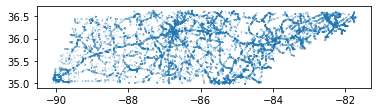

In [231]:
df.plot()

### Map of a Single Object

<AxesSubplot:>

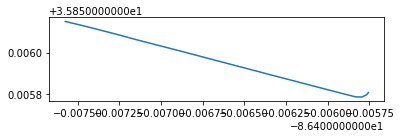

In [232]:
df[df['LENGTH'] == 561.599980].head(1).plot()

### Plot of Guardrail Lenghts

<AxesSubplot:xlabel='OBJECTID'>

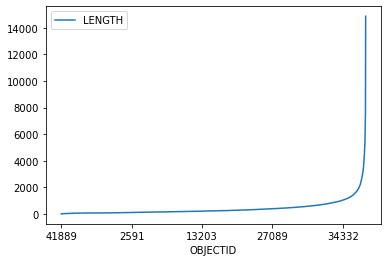

In [233]:
# grab only the data we need and convert it back to a normal pandas data frame
plt_df = pd.DataFrame(df.loc[:, ['LENGTH', 'OBJECTID']])

# make the Object ID into a string
plt_df.loc[:,'OBJECTID'] = plt_df.loc[:, 'OBJECTID'].astype("string")

# sort by the value
plt_df.sort_values('LENGTH', ascending=True, inplace=True)

# plot
plt_df.plot(x='OBJECTID', y='LENGTH')


## Reformatting

We need to create the appropriate columns for inclusion in database. First we specify them and then create a series of mapping tables for the data we are given into the data we need.

In [234]:
# the columns we need to upload
new_cols = ['featureType', 'subtype', 'device', 'source', 'wikiUrl', 'notes', 'geometry', 'createdAt', 'updatedAt', 'createdBy']

In [235]:
# create the featureType column
mapping = {'W-Beam':'VehicleBarrier', 
            'Wooden':'VehicleBarrier',
            'Cable Barrier - NuCable':'VehicleBarrier',
            'Cable Barrier - Brifen WRSF':'VehicleBarrier',
            'Cable Barrier - Gibraltar NCHRP350':'VehicleBarrier',
            'Cable Barrier - Safence':'VehicleBarrier',
            'Cable Barrier - Trinity CASS':'VehicleBarrier',
            }
df['featureType'] =  df['FEAT_DESC'].map(mapping)

In [236]:
# create the subtype column
mapping = {'W-Beam':'WBeam', 
            'Wooden':'Other',
            'Cable Barrier - NuCable':'Cable',
            'Cable Barrier - Brifen WRSF':'Cable',
            'Cable Barrier - Gibraltar NCHRP350':'Cable',
            'Cable Barrier - Safence':'Cable',
            'Cable Barrier - Trinity CASS':'Cable',
            }
df['subtype'] =  df['FEAT_DESC'].map(mapping)

In [237]:
# create the device column
mapping = {'W-Beam':None, 
            'Wooden':None,
            'Cable Barrier - NuCable':'NuCable',
            'Cable Barrier - Brifen WRSF':'Brifen WRSF',
            'Cable Barrier - Gibraltar NCHRP350':'Gibraltar NCHRP350',
            'Cable Barrier - Safence':'Safence',
            'Cable Barrier - Trinity CASS':'Trinity CASS',
            }
df['device'] =  df['FEAT_DESC'].map(mapping)

In [238]:
# create the source column
df['source'] =  'Tennessee DOT - ' + str(dt.date.today())

In [239]:
# create the wikiUrl column
mapping = {'W-Beam':'https://wiki.safe7y.com/Features/VehicleBarrier/WBeam', 
            'Wooden':'https://wiki.safe7y.com/en/Features/VehicleBarrier/Other',
            'Cable Barrier - NuCable':'https://wiki.safe7y.com/Features/VehicleBarrier/Cable',
            'Cable Barrier - Brifen WRSF':'https://wiki.safe7y.com/Features/VehicleBarrier/Cable',
            'Cable Barrier - Gibraltar NCHRP350':'https://wiki.safe7y.com/Features/VehicleBarrier/Cable',
            'Cable Barrier - Safence':'https://wiki.safe7y.com/Features/VehicleBarrier/Cable',
            'Cable Barrier - Trinity CASS':'https://wiki.safe7y.com/Features/VehicleBarrier/Cable',
            }
df['wikiUrl'] =  df['FEAT_DESC'].map(mapping)

In [240]:
# create the notes column
# Start with a basic description
mapping = {'W-Beam':'A W-Beam guardrail', 
            'Wooden':'A wooden guardrail',
            'Cable Barrier - NuCable':'A NuCable cable barrier',
            'Cable Barrier - Brifen WRSF':'A Brifen WRSF cable barrer',
            'Cable Barrier - Gibraltar NCHRP350':'A Gibraltar NCHRP 350 cable barrier',
            'Cable Barrier - Safence':'A Safence cable barrier',
            'Cable Barrier - Trinity CASS':'A Trinity CASS cable barrier',
            }
df['notes'] =  df['FEAT_DESC'].map(mapping)
# then add in the relevant information about height, length, and everything else
df['notes'] = df['notes'] + ' located ' + df['LOC_DESC'] + ' of the roadway, standing ' + df['HEIGHT'].astype('string') \
                + ' inches above grade, and running for ' + df['LENGTH'].astype('string') + ' feet. ' \
                + 'Collected at ' + df['DATE_COLL'].astype('string') + ', and delivered ' \
                + df['DELIVERY'].astype('string') + ' by Mandli Communications, Inc.' \
                + ' Accessed on ' + str(dt.date.today()) + ' at https://hub.arcgis.com/datasets/e6fc8455ea2b4774b98114025feccefe_0/explore?location=35.775942%2C-85.947596%2C8.00'

In [241]:
# create the createdAt and updatedAt columns
df['createdAt'] = df['DATE_COLL']
df['updatedAt'] = dt.datetime.now()
df['createdBy'] = 'streetsweeper-' + str(dt.datetime.now())

## Data Upload

Having generated all the required columns we now need to open a connection to the Safety in Numbers database. Access to this database is protected so if you are using this project for your own purposes this is the part where you'll need to enter your own database details.

In [242]:
# load credentials
load_dotenv('../.env')
username = os.getenv('POSTGIS_USERNAME')
password = os.getenv('POSTGIS_PASSWORD')
endpoint = os.getenv('POSTGIS_ENDPOINT')
database = 'postgres'
port = '5432'
db_connection_url = 'postgresql://' + username + ':' + password + '@' + endpoint + ':' + port + '/' + database
# open a connection to the database
engine = create_engine(db_connection_url)
# # do a short test read
# sql = 'SELECT * FROM public."Features" ORDER BY id DESC LIMIT 100;'
# test_read_df = gpd.read_postgis(sql=sql, con=engine, geom_col='geometry')
# test_read_df

As a test we'll work on uploading just two barriers. The first one should be located [here](https://map.safe7y.com/#center=17.3/35.309274/-89.840867) and the second one near [here](https://map.safe7y.com/#center=15/35.3087/-89.83566)

In [243]:
# identify two well known records as a test
test_df = df[df['device'] == 'Brifen WRSF'].iloc[0:2]
# take only the columns we need
test_df = test_df[new_cols]
test_df

featureType subtype       device                      source  \
7450  VehicleBarrier   Cable  Brifen WRSF  Tennessee DOT - 2021-09-23   
7451  VehicleBarrier   Cable  Brifen WRSF  Tennessee DOT - 2021-09-23   

                                                    wikiUrl  \
7450  https://wiki.safe7y.com/Features/VehicleBarrier/Cable   
7451  https://wiki.safe7y.com/Features/VehicleBarrier/Cable   

                                                                                                                                                                                                                                                                                                                                                                               notes  \
7450        A Brifen WRSF cable barrer located Median Right of the roadway, standing 34.5 inches above grade, and running for 3256.0 feet. Collected at 2019-03-27T00:00:00, and delivered May_2019_Del_1 by Mandli Communications, Inc. Accessed on 2021-09-23 at https://hub.arcgis.com/datasets/e6fc8455ea2b4774b98114025feccefe_0/explore?location=35.775942%2C-85.947596%2C8.00   
7451  A Brifen WRSF cable barrer located Median Right of the roadway, standing 36.700001 inches above grade, and running for 11833.0 feet. Collected at 2019-03-27T00:00:00, and delivered May_2019_Del_1 by Mandli Communications, Inc. Accessed on 2021-09-23 at https://hub.arcgis.com/datasets/e6fc8455ea2b4774b98114025feccefe_0/explore?location=35.775942%2C-85.947596%2C8.00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [244]:
# upload 
# test_df.to_postgis(name='Features', con=engine, if_exists='append', index=False)


In [245]:
# now the real deal
df = df[new_cols]
df.to_postgis(name='Features', con=engine, if_exists='append', index=False)